In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
from google.colab import drive


In [106]:
url="https://raw.githubusercontent.com/ayushbabuta/Black-Friday-sale-analysis/main/BlackFriday%20(1).csv"
df=pd.read_csv(url)

In [107]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [17]:
df.isnull().sum()

,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,57313


In [18]:
df[df["Product_Category_2"].isnull()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
9,1000005,P00274942,M,26-35,20.0,A,1,1.0,8.0,NaN,NaN,7871.0
11,1000005,P00014542,M,26-35,20.0,A,1,1.0,8.0,NaN,NaN,3957.0
...,...,...,...,...,...,...,...,...,...,...,...,...
184639,1004471,P00297942,M,26-35,6.0,A,1,0.0,8.0,NaN,NaN,7829.0
184640,1004471,P00223142,M,26-35,6.0,A,1,0.0,5.0,NaN,NaN,3721.0
184650,1004472,P00030742,F,46-50,16.0,B,0,1.0,1.0,NaN,NaN,19552.0
184658,1004472,P00165842,F,46-50,16.0,B,0,1.0,14.0,NaN,NaN,15122.0


In [19]:
df.corr(numeric_only=True)

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.022237,0.014832,-0.000158,0.004087,-0.002671,0.003914
Occupation,-0.022237,1.000000,0.028092,-0.005717,-0.001492,0.012244,0.018834
Marital_Status,0.014832,0.028092,1.000000,0.016166,0.014643,0.018060,0.002702
Product_Category_1,-0.000158,-0.005717,0.016166,1.000000,0.538831,0.230902,-0.316878
Product_Category_2,0.004087,-0.001492,0.014643,0.538831,1.000000,0.546687,-0.208179
Product_Category_3,-0.002671,0.012244,0.018060,0.230902,0.546687,1.000000,-0.028653
Purchase,0.003914,0.018834,0.002702,-0.316878,-0.208179,-0.028653,1.000000


In [20]:
del df["Product_Category_2"]
del df["Product_Category_3"]

In [21]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Purchase
count,1.846620e+05,184661.000000,184661.000000,184661.000000,184661.000000
mean,1.002907e+06,8.101088,0.407298,5.290007,9319.145597
std,1.690642e+03,6.526969,0.491332,3.744432,4981.595464
min,1.000001e+06,0.000000,0.000000,1.000000,185.000000
25%,1.001447e+06,2.000000,0.000000,1.000000,5855.000000
50%,1.002918e+06,7.000000,0.000000,5.000000,8058.000000
75%,1.004274e+06,14.000000,1.000000,8.000000,12067.000000
max,1.006040e+06,20.000000,1.000000,18.000000,23961.000000


Columan analysis

In [22]:
for i in df.columns:
    print(f"Unique values in {i} are:{df[i].nunique()}\n {df[i].unique()}\n")

Unique values in User_ID are:5886
 [1000001 1000002 1000003 ... 1001282 1001674 1004293]

Unique values in Product_ID are:3457
 ['P00069042' 'P00248942' 'P00087842' ... 'P00281442' 'P00105842' nan]

Unique values in Gender are:2
 ['F' 'M' nan]

Unique values in Age are:7
 ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25' nan]

Unique values in Occupation are:21
 [10. 16. 15.  7. 20.  9.  1. 12. 17.  0.  3.  4. 11.  8. 19.  2. 18.  5.
 14. 13.  6. nan]

Unique values in City_Category are:3
 ['A' 'C' 'B' nan]

Unique values in Stay_In_Current_City_Years are:5
 ['2' '4+' '3' '1' '0' nan]

Unique values in Marital_Status are:2
 [ 0.  1. nan]

Unique values in Product_Category_1 are:18
 [ 3.  1. 12.  8.  5.  4.  2.  6. 14. 11. 13. 15.  7. 16. 18. 10. 17.  9.
 nan]

Unique values in Purchase are:15576
 [ 8370. 15200.  1422. ... 18863.  6600.    nan]



In [23]:
"""data_gen=pd.DataFrame({"Ratio":[len(df[df["Gender"]=="M"]) ,len(df[df["Gender"]=="F"])]},index=["Male","Female"])
data_gen.plot.pie(subplots=True,autopct="%.1f")"""

'data_gen=pd.DataFrame({"Ratio":[len(df[df["Gender"]=="M"]) ,len(df[df["Gender"]=="F"])]},index=["Male","Female"])\ndata_gen.plot.pie(subplots=True,autopct="%.1f")'

# Gender Analysis

<Axes: title={'center': 'Gender Distribution'}>

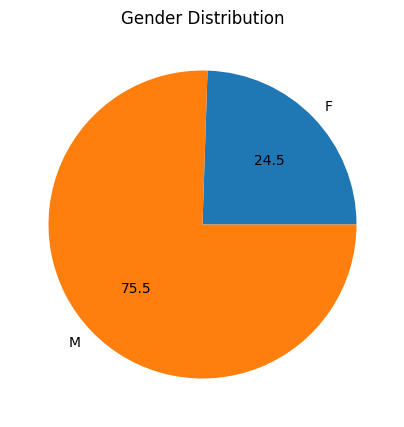

In [24]:
df.groupby(by="Gender").size().plot.pie(autopct="%.1f"
                                       ,title="Gender Distribution",
                                       figsize=(5,5))

In [25]:
df.groupby(by="Gender").size()


,0
Gender,
F,45201
M,139460


<Axes: title={'center': 'Gender Ratio'}, xlabel='Gender'>

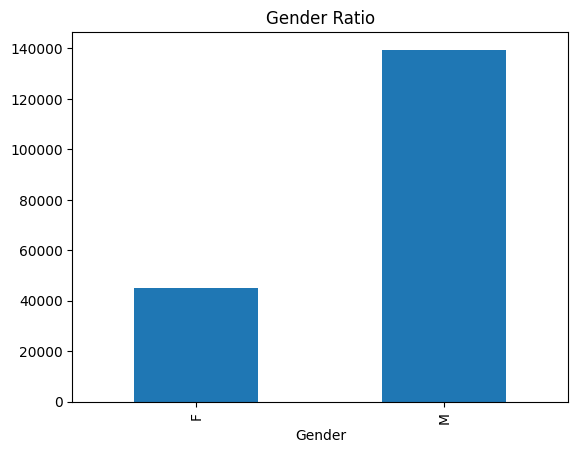

In [26]:
df.groupby(by="Gender").size().plot(kind="bar",title="Gender Ratio")

<Axes: xlabel='Gender'>

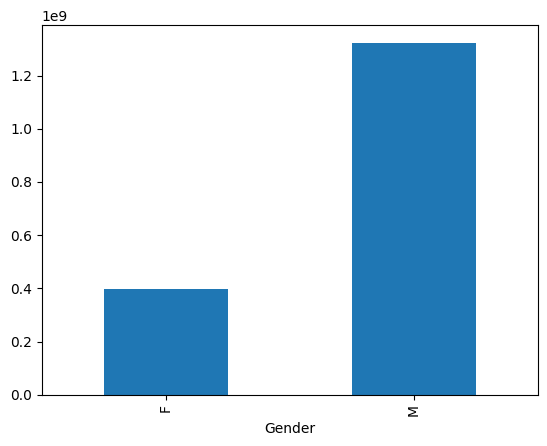

In [27]:
#Amount spend by male and female
df.groupby(by="Gender").sum()["Purchase"].plot(kind="bar")

<Axes: ylabel='Purchase'>

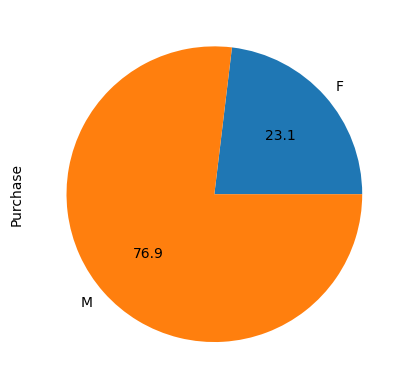

In [28]:
##Amount spend by male and female(RAtio)
df.groupby(by="Gender").sum()["Purchase"].plot(kind="pie",autopct="%.1f")

<Axes: ylabel='Purchase'>

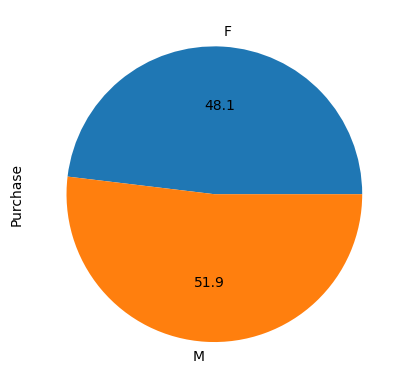

In [30]:
#What is the avg price spend by male and female
df.groupby(by="Gender").mean(numeric_only=True)["Purchase"].plot(kind="pie",autopct="%.1f")

In [ ]:
df.groupby("Gender").mean(numeric_only=True)["Purchase"].plot(kind="bar")

# Age And Maritial status

In [31]:
df.groupby(by="Age").size()["Purchase"].plot(kind="bar",title="product Distribution by age")

KeyError: 'Purchase'

<Axes: title={'center': 'Amount Distribution by age'}, xlabel='Age'>

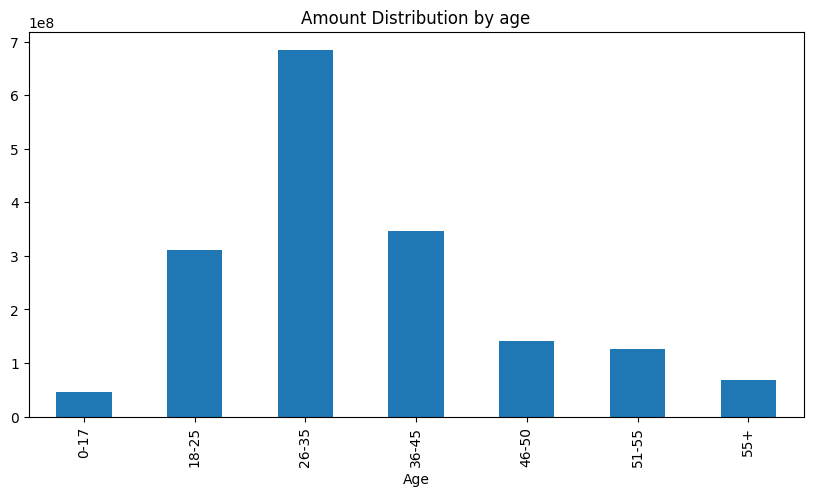

In [32]:
df.groupby(by="Age").sum()["Purchase"].plot.bar(title="Amount Distribution by age",figsize=(10,5))

In [33]:
for i in df["Age"].unique():
  print(i,":",len(df[df["Age"]==i]))

0-17 : 4984
55+ : 7230
26-35 : 73615
46-50 : 15101
51-55 : 13029
36-45 : 36806
18-25 : 33896
nan : 0


<Axes: xlabel='Age'>

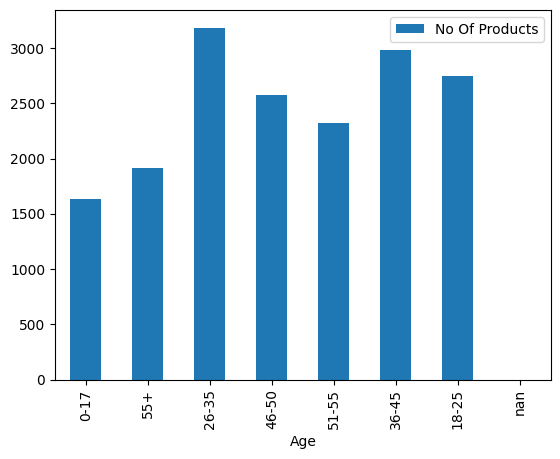

In [35]:
l=[]
for i in df["Age"].unique():
   l.append((i,df[df["Age"]==i]["Product_ID"].nunique()))
pd.DataFrame(l,columns=["Age","No Of Products"]).plot(kind="bar",x="Age",y="No Of Products")

In [ ]:
#df.groupby(by="Age").sum()["Purchase"].plot(kind="bar")

<Axes: ylabel='Purchase'>

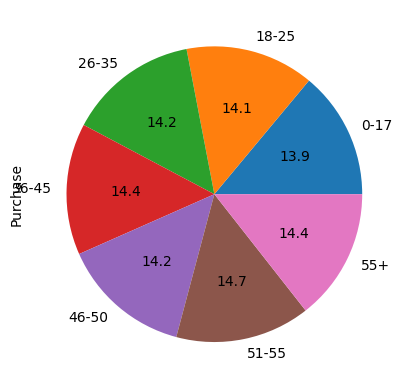

In [37]:
df.groupby('Age').mean(numeric_only=True)['Purchase'].plot(kind = 'pie', autopct = '%0.1f')


<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

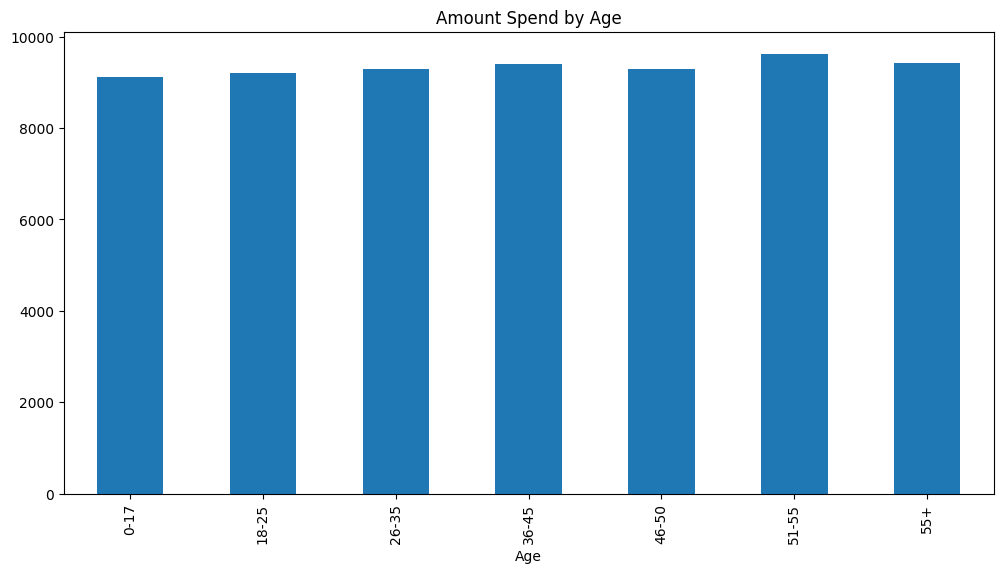

In [38]:
df.groupby('Age').mean(numeric_only=True)['Purchase'].plot(kind = 'bar', figsize = (12, 6), title = 'Amount Spend by Age')


<Axes: >

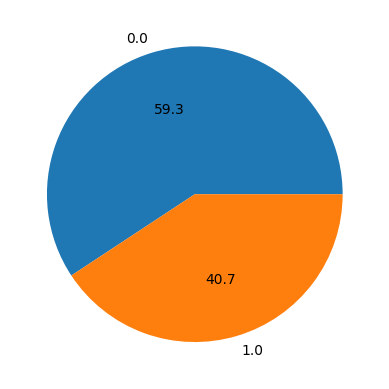

In [39]:
df.groupby(by="Marital_Status").size().plot(kind="pie",autopct="%.1f")

# Bivariate Analysis

In [40]:
df.sample(9)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
107337,1004502,P00345942,M,51-55,0.0,C,1,1.0,8.0,9957.0
7451,1001164,P00197742,F,26-35,19.0,A,1,1.0,14.0,7575.0
32157,1004933,P00126042,M,26-35,15.0,B,3,0.0,8.0,6039.0
19629,1003084,P00349442,M,26-35,16.0,B,1,1.0,6.0,12248.0
157654,1000343,P00066442,F,36-45,3.0,B,2,0.0,5.0,8841.0
76831,1005831,P00024742,M,26-35,1.0,A,2,1.0,8.0,8120.0
78975,1000151,P00330842,F,26-35,20.0,A,1,1.0,14.0,14952.0
156750,1000200,P00088042,F,18-25,4.0,C,0,0.0,1.0,15607.0
115163,1005776,P00255942,M,18-25,12.0,B,3,1.0,1.0,11898.0


<Axes: xlabel='Age', ylabel='count'>

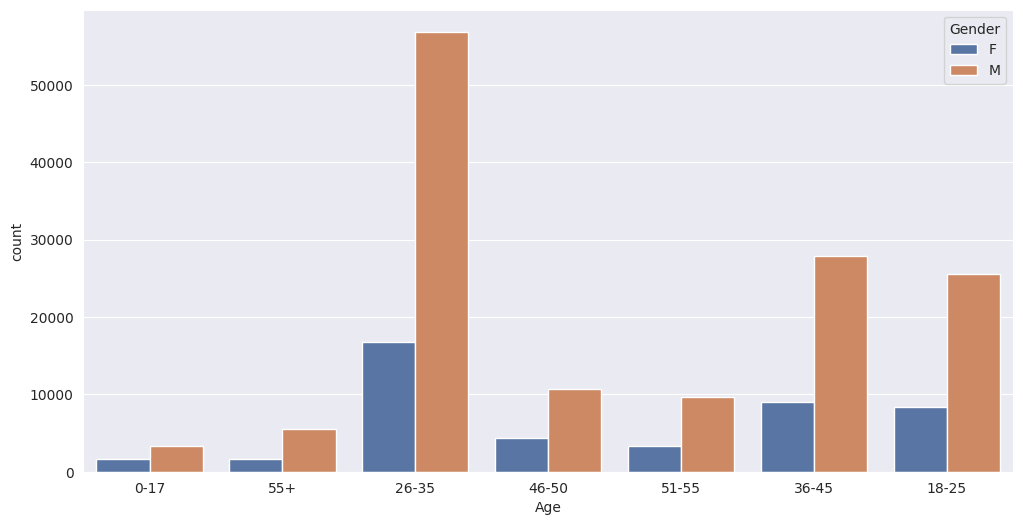

In [41]:
sns.set({"figure.figsize":(12,6)})
sns.countplot(data=df,hue="Gender",x="Age")

<Axes: xlabel='Gender', ylabel='count'>

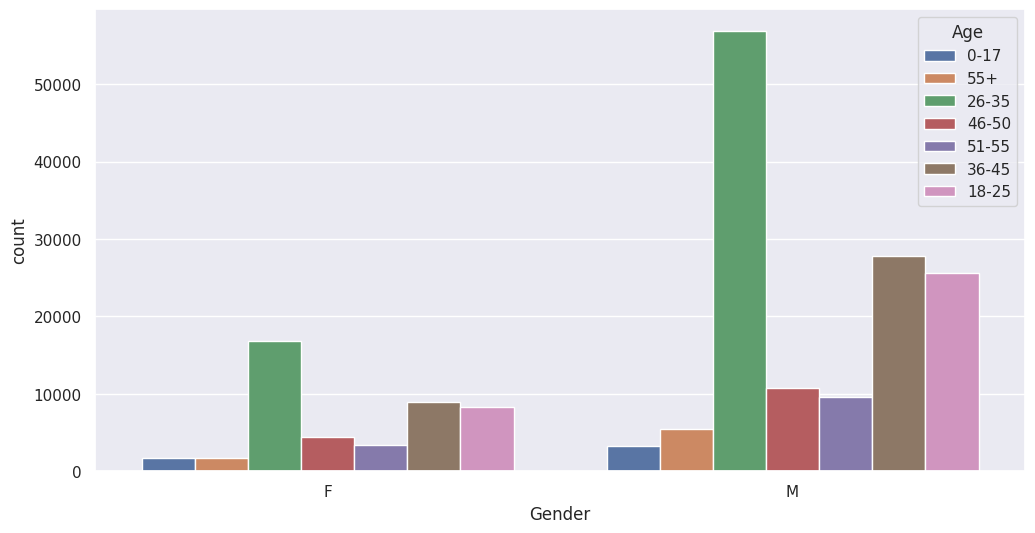

In [42]:
sns.set(rc={"figure.figsize":(12,6)})
sns.countplot(df,x="Gender",hue="Age")

<Axes: xlabel='Gender', ylabel='count'>

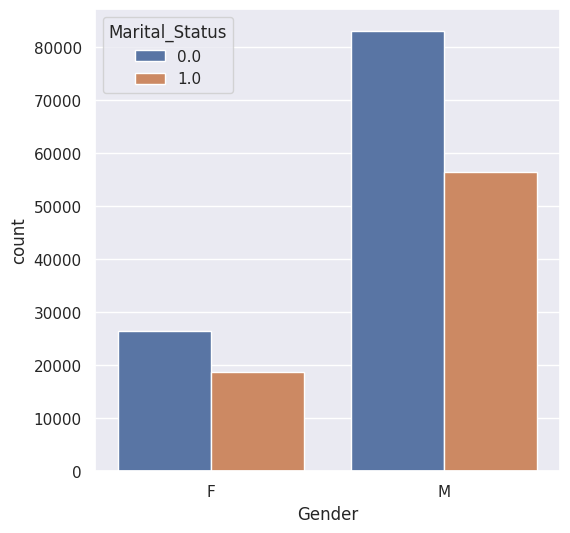

In [63]:
sns.set(rc = {'figure.figsize' : (6,6)})
sns.countplot(x ="Gender", hue ='Marital_Status', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

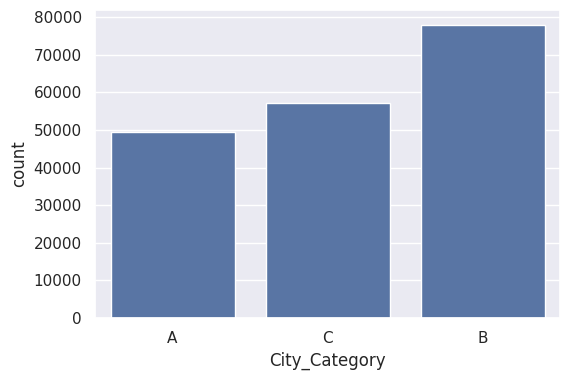

In [64]:
sns.set({"figure.figsize":(6,4)})
sns.countplot(x=df["City_Category"])

<Axes: >

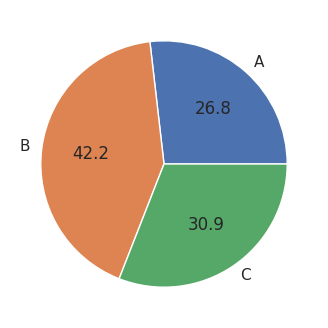

In [65]:
df.groupby(by="City_Category").size().plot(kind="pie",autopct="%.1f")

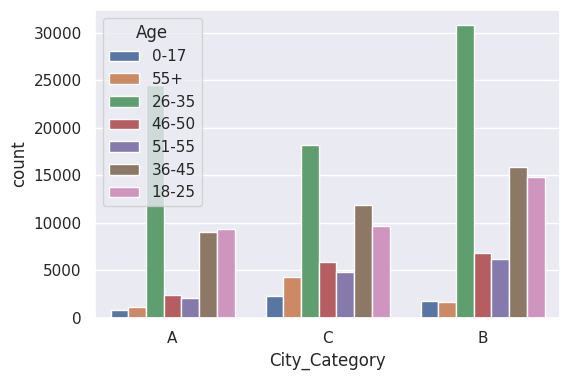

In [66]:
sns.countplot(df,x="City_Category",hue="Age")
sns.set({"figure.figsize":(7,6)})

<Axes: xlabel='Marital_Status', ylabel='count'>

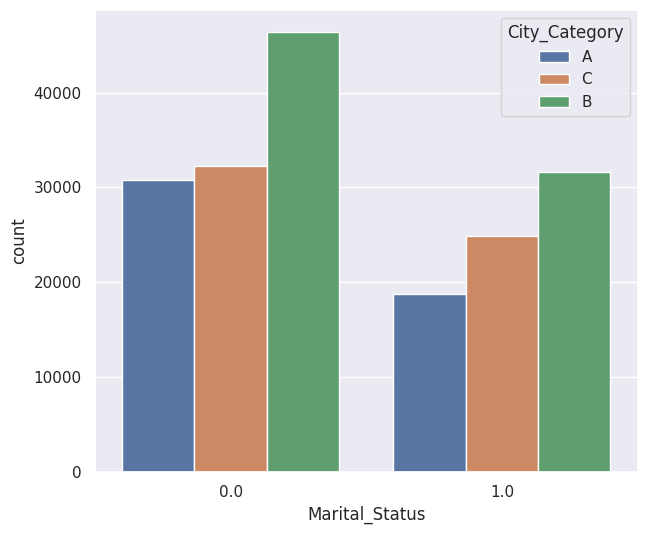

In [67]:
sns.countplot(data=df,x="Marital_Status",hue="City_Category")

<Axes: xlabel='Gender', ylabel='count'>

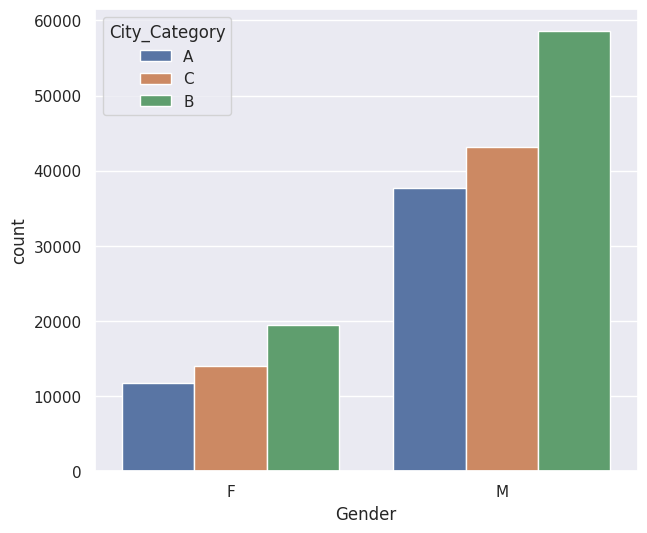

In [68]:
sns.countplot(df,x="Gender",hue="City_Category")

<Axes: ylabel='Purchase'>

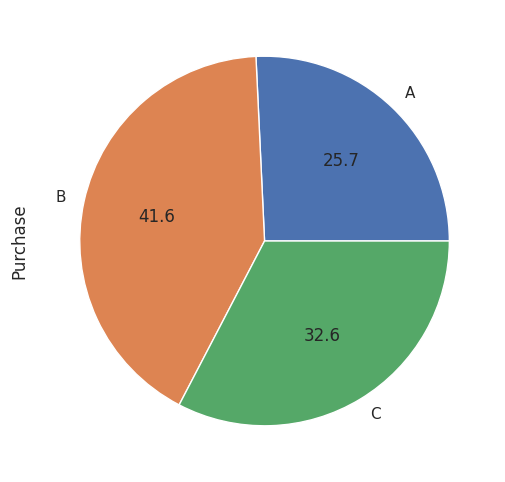

In [69]:
df.groupby(by="City_Category").sum(numeric_only=True)["Purchase"].plot(kind="pie",autopct="%.1f")

<Axes: ylabel='Purchase'>

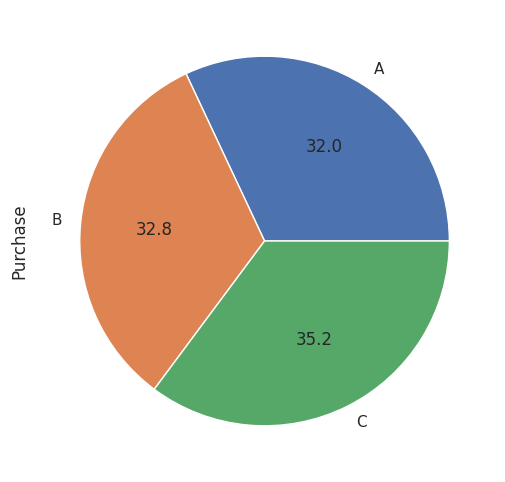

In [70]:
df.groupby(by="City_Category").mean(numeric_only=True)["Purchase"].plot(kind="pie",autopct="%.1f")

# Occupation and product analysis

In [71]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0,F_0.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0,F_0.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0,F_0.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0,F_0.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0,M_0.0


<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

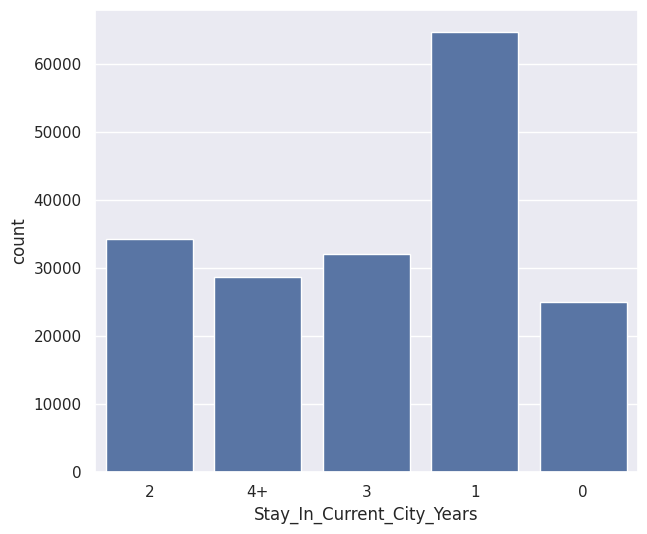

In [72]:
sns.countplot(df,x="Stay_In_Current_City_Years")

<Axes: >

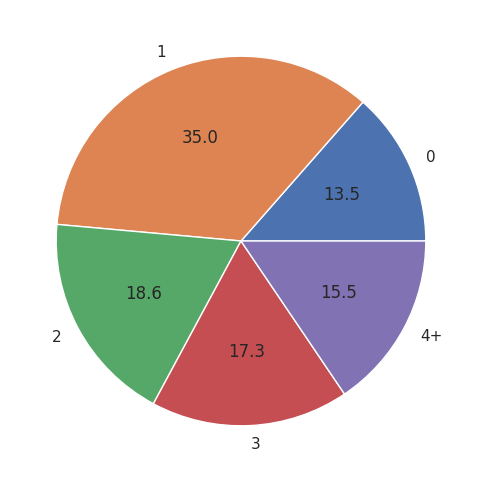

In [73]:
df.groupby(by="Stay_In_Current_City_Years").size().plot(kind="pie",autopct="%.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

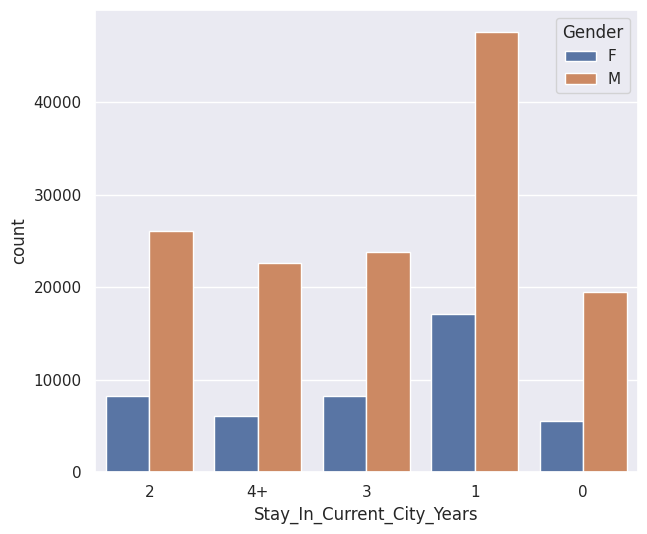

In [74]:
sns.countplot(df,x="Stay_In_Current_City_Years",hue="Gender")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

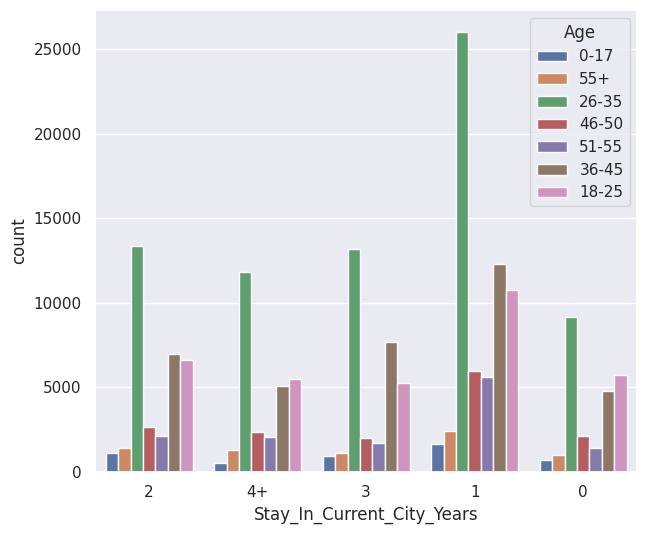

In [75]:
sns.countplot(x="Stay_In_Current_City_Years",hue="Age",data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

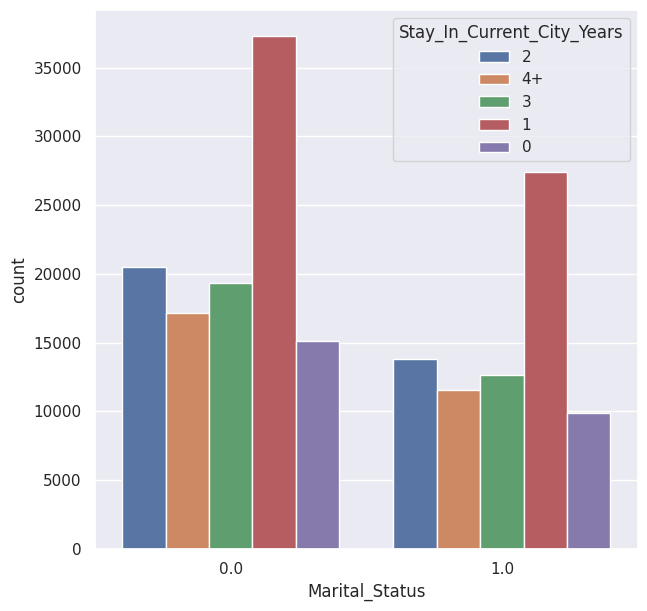

In [76]:
sns.set({"figure.figsize":(7,7)})

sns.countplot(df,hue="Stay_In_Current_City_Years",x="Marital_Status")

<Axes: xlabel='City_Category', ylabel='count'>

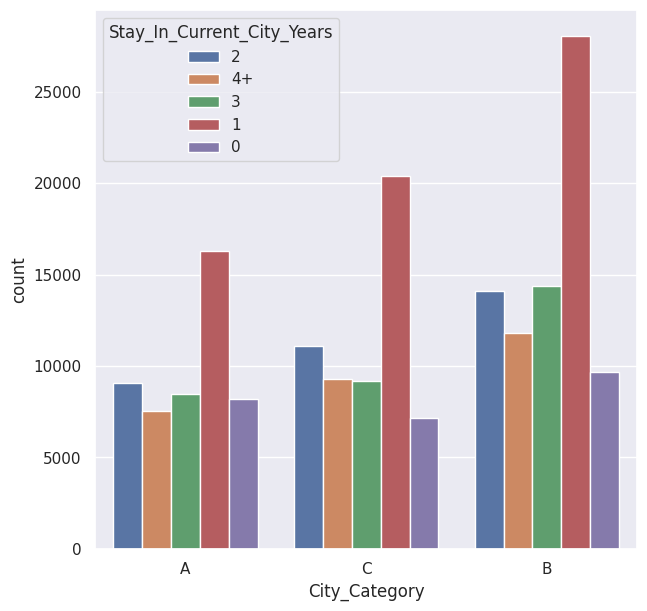

In [77]:
sns.set({"figure.figsize":(7,7)})
sns.countplot(df,hue="Stay_In_Current_City_Years",x="City_Category")

<Axes: xlabel='Stay_In_Current_City_Years'>

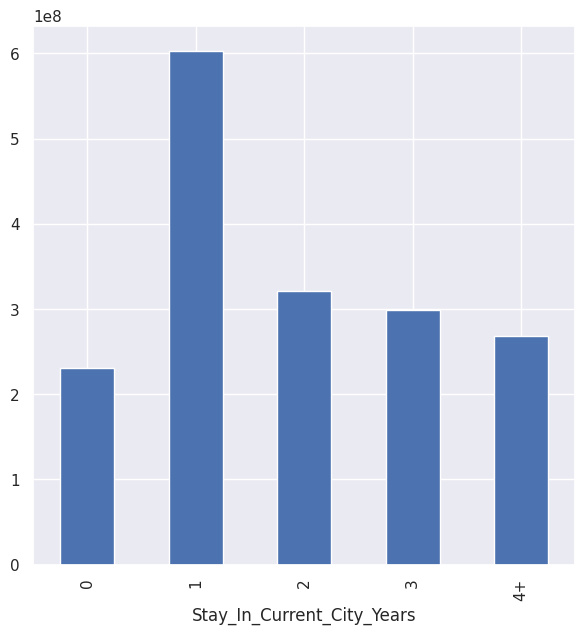

In [78]:
df.groupby(by="Stay_In_Current_City_Years").sum()["Purchase"].plot(kind="bar")

<Axes: xlabel='Stay_In_Current_City_Years'>

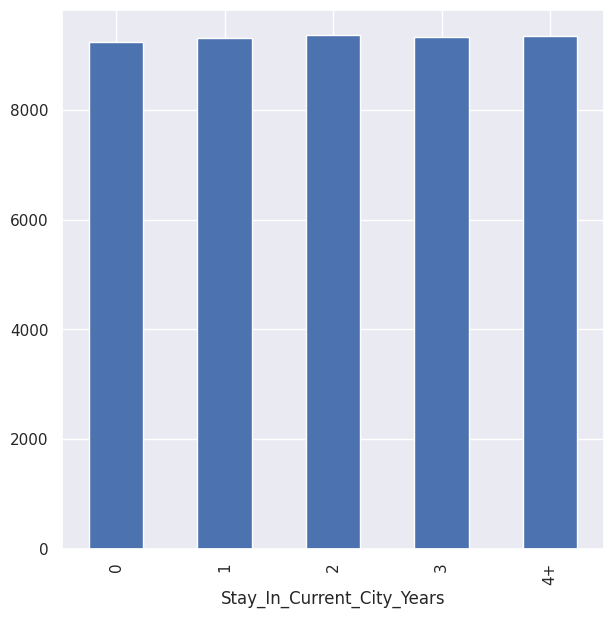

In [79]:
df.groupby(by="Stay_In_Current_City_Years").mean(numeric_only=True)["Purchase"].plot(kind="bar")

<Axes: xlabel='Occupation', ylabel='count'>

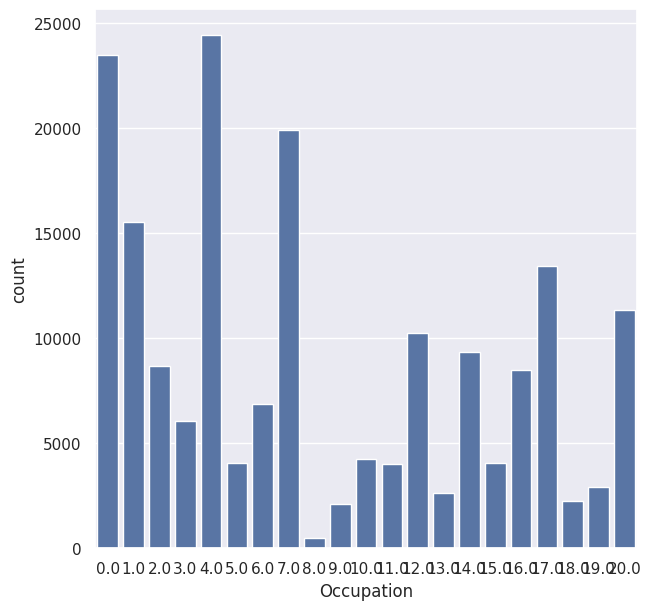

In [80]:
sns.countplot(x=df["Occupation"])

<Axes: xlabel='Occupation'>

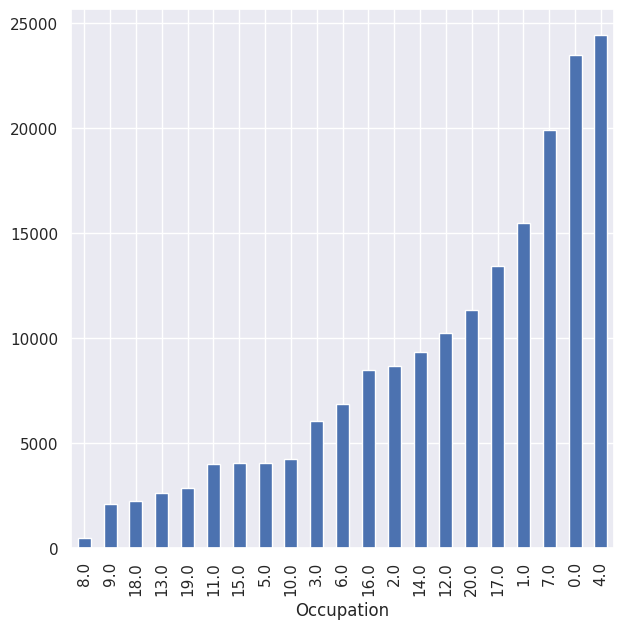

In [81]:
df.groupby(by="Occupation").size().sort_values().plot(kind="bar")

<Axes: xlabel='Occupation'>

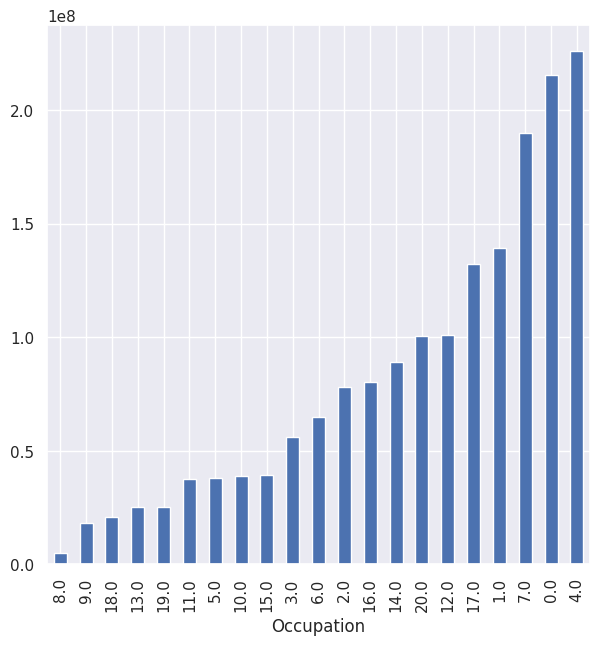

In [82]:
df.groupby(by="Occupation").sum()["Purchase"].sort_values().plot(kind="bar")

In [83]:
df.groupby(by="Occupation").mean(numeric_only=True)["Purchase"]

,Purchase
Occupation,
0.0,9175.610607
1.0,8969.498260
2.0,9003.929157
3.0,9284.539021
4.0,9243.152937
5.0,9382.003683
6.0,9434.364853
7.0,9526.585828
8.0,9649.819085


<Axes: xlabel='Occupation', ylabel='count'>

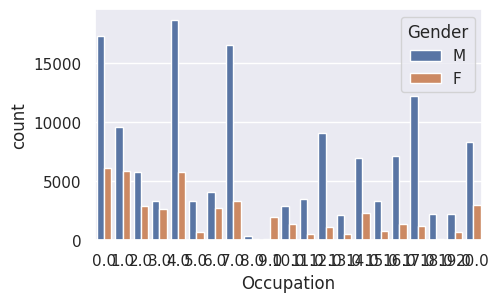

In [84]:
sns.set({"figure.figsize":(5,3)})
sns.countplot(df,x="Occupation",hue="Gender")


<Axes: xlabel='Occupation', ylabel='count'>

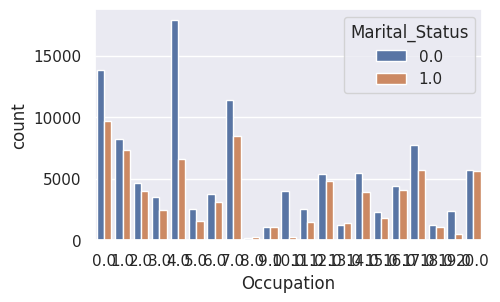

In [86]:
sns.countplot(df,x="Occupation",hue="Marital_Status")

In [88]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0,F_0.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0,F_0.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0,F_0.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0,F_0.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0,M_0.0


<Axes: xlabel='Occupation'>

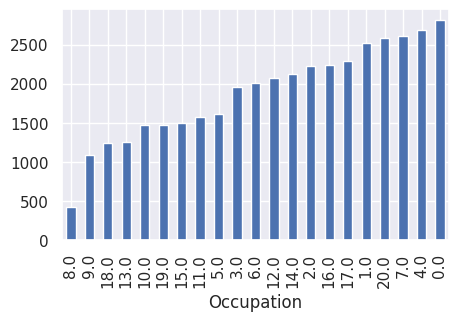

In [89]:
df.groupby(by="Occupation").nunique()["Product_ID"].sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

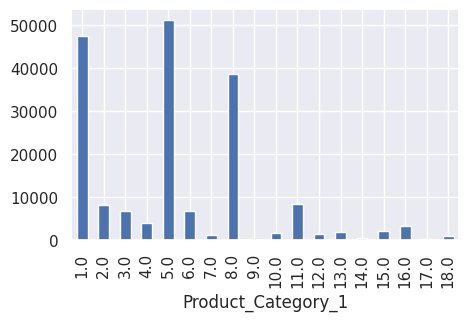

In [90]:
df.groupby(by="Product_Category_1").size().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

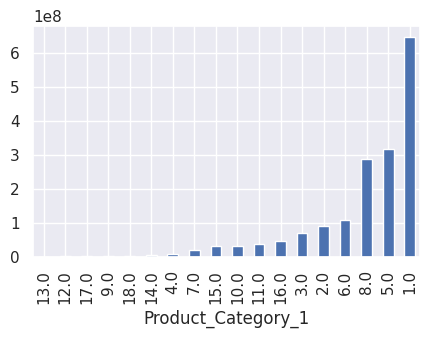

In [91]:
df.groupby(by="Product_Category_1").sum()["Purchase"].sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1'>

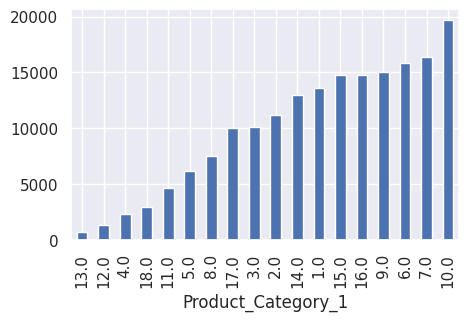

In [92]:
df.groupby(by="Product_Category_1").mean(numeric_only=True)["Purchase"].sort_values().plot(kind="bar")

<Axes: xlabel='Product_ID'>

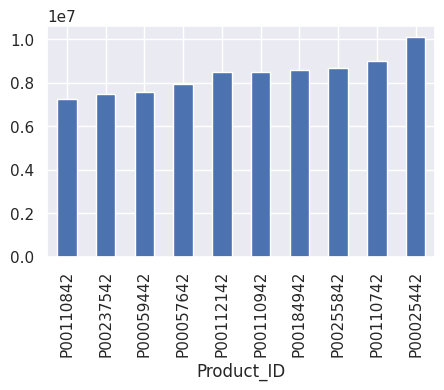

In [93]:
df.groupby(by="Product_ID").sum()["Purchase"].nlargest(10).sort_values().plot(kind="bar")

<Axes: xlabel='Product_ID'>

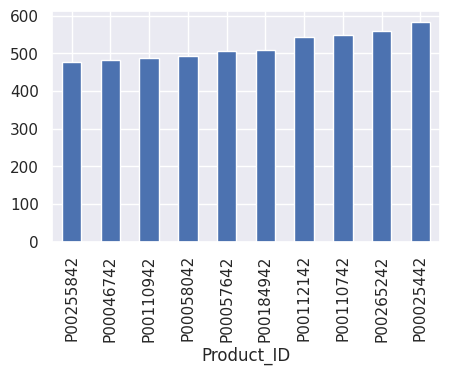

In [94]:
df.groupby(by="Product_ID").size().nlargest(10).sort_values().plot(kind="bar")

<Axes: xlabel='Product_ID'>

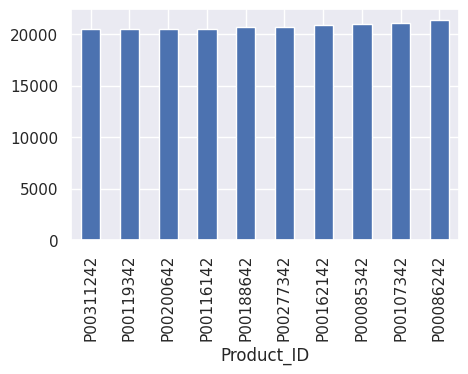

In [95]:
df.groupby(by="Product_ID").mean(numeric_only=True)["Purchase"].nlargest(10).sort_values().plot(kind="bar")

<Axes: xlabel='Product_Category_1', ylabel='count'>

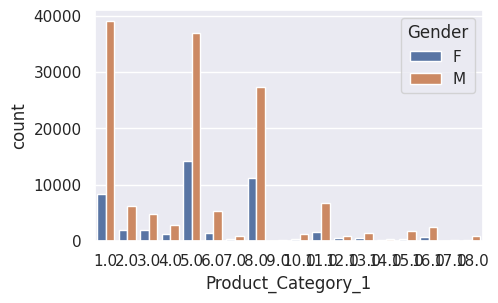

In [96]:
sns.countplot(df,x="Product_Category_1",hue="Gender")

<Axes: xlabel='Product_Category_1', ylabel='count'>

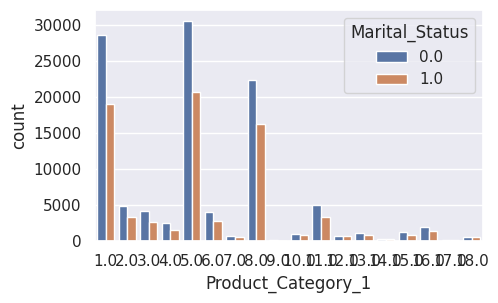

In [97]:

sns.countplot(data=df,x="Product_Category_1",hue="Marital_Status",)

In [98]:
li=[]
for i in range(len(df)):
    li.append(str(df["Gender"][i])+"_"+str(df["Marital_Status"][i]))


In [99]:
df["Marital_Gender"]=li

In [100]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,Marital_Gender
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,8370.0,F_0.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,15200.0,F_0.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,1422.0,F_0.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,1057.0,F_0.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,7969.0,M_0.0


<Axes: xlabel='Marital_Gender', ylabel='count'>

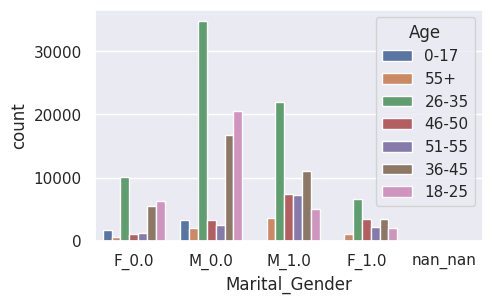

In [101]:
sns.countplot(df,x="Marital_Gender",hue="Age")

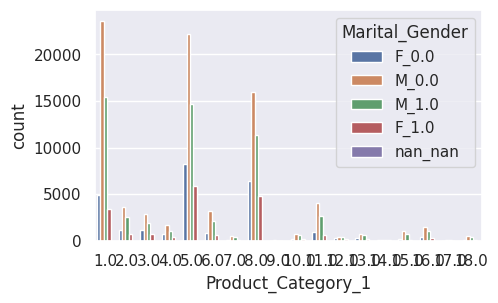

In [102]:
sns.countplot(df,x="Product_Category_1",hue="Marital_Gender")
sns.set({"figure.figsize":(5,5)})

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

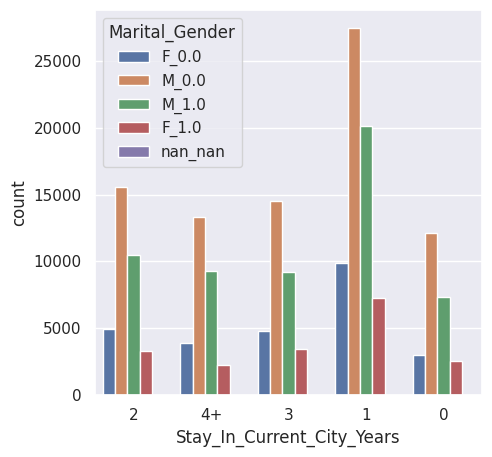

In [103]:
sns.countplot(df,x="Stay_In_Current_City_Years",hue="Marital_Gender")


<Axes: xlabel='City_Category', ylabel='count'>

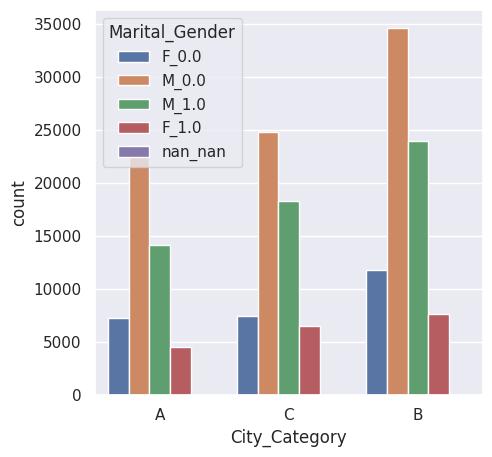

In [104]:
sns.countplot(df,x="City_Category",hue="Marital_Gender")
